# RandomForestRegressor

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from utils import get_cv, get_train_data 
import external_data.example_estimator as ex 


In [2]:
X, y = get_train_data()
X.columns


Index(['site_id', 'latitude', 'longitude', 'numer_sta', 'pmer', 'tend',
       'cod_tend', 'dd', 'ff', 't', 'td', 'u', 'vv', 'ww', 'w1', 'w2', 'n',
       'nbas', 'hbas', 'cl', 'cm', 'ch', 'pres', 'tend24', 'raf10', 'rafper',
       'per', 'etat_sol', 'ht_neige', 'ssfrai', 'perssfrai', 'rr1', 'rr3',
       'rr6', 'rr12', 'rr24', 'nnuage1', 'ctype1', 'hnuage1', 'is_sun_up',
       'year', 'month', 'day', 'weekday', 'hour'],
      dtype='object')

In [3]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)


In [4]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and calculate RMSE
y_pred = rf_model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"Random Forest RMSE: {rmse:.2f}")

Random Forest RMSE: 0.67


------------

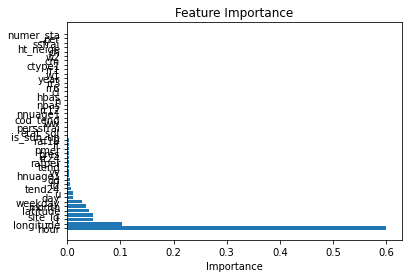

In [ ]:
import matplotlib.pyplot as plt

# Feature importance
importance = rf_model.feature_importances_
features = X.columns

# Sort by importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance}).sort_values(by='Importance', ascending=False)

plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


In [10]:
feature_importance

,Feature,Importance
44,hour,0.599088
2,longitude,0.103958
9,t,0.048318
0,site_id,0.048254
1,latitude,0.040442
41,month,0.036468
43,weekday,0.027624
42,day,0.012053
11,u,0.010946
23,tend24,0.006477


## Making predictions for Kaggle

In [6]:
test = get_train_data(path="data/final_test.parquet")

test = scaler.transform(test)
test.shape

(51440, 45)

In [7]:
y_pred = rf_model.predict(test)
results = pd.DataFrame(
    dict(
        Id=np.arange(y_pred.shape[0]),
        log_bike_count=y_pred,
    )
)
results.to_csv("submission.csv", index=False)


This seems to be an ok result actually.

TO DO:
- ~~is_sun_up~~
- dates one-hot-encoding
- ~~automate the process using functions~~
- Add the scalar into our function 